In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import re

matplotlib.use('cairo')

In [2]:
size = 15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,10),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': size*1.25,
          'ytick.labelsize': size*1.25,
          'axes.titlepad': 25}
plt.rcParams['font.sans-serif'] = ['Avenir', 'sans-serif']
plt.rcParams.update(params)

# Exploratory data analysis 

## Medical text dataset

In [3]:
DATA_TRAIN = '../data/medical-text/train.dat'
DATA_TEST = '../data/medical-text/test.dat'

## TRAIN DATA

In [4]:
comments = open(DATA_TRAIN, 'rb').readlines()

In [5]:
def split_tab(comment):
    return comment.decode(encoding='utf-8').split('\t')[1]

In [6]:
comments_clean = list(map(split_tab, comments))

In [7]:
comments_clean = ' '.join(comments_clean)

In [8]:
print(f'Length of text: {len(comments_clean)} characters')

Length of text: 17797244 characters


In [9]:
sentences_tr = comments_clean.split(' \n ')

In [10]:
avg_char = list(map(len, sentences_tr))

In [11]:
print('Average no of caracters per comment: {}'.format(np.average(avg_char)))

Average no of caracters per comment: 1229.6670591494667


In [12]:
def len_tokens(com):
    a = com.split(' ')
    return len(a)

In [13]:
avg_tokens = list(map(len_tokens, sentences_tr))

In [14]:
print('Average no of tokens per comment: {}'.format(np.average(avg_tokens)))

Average no of tokens per comment: 179.9371796647735


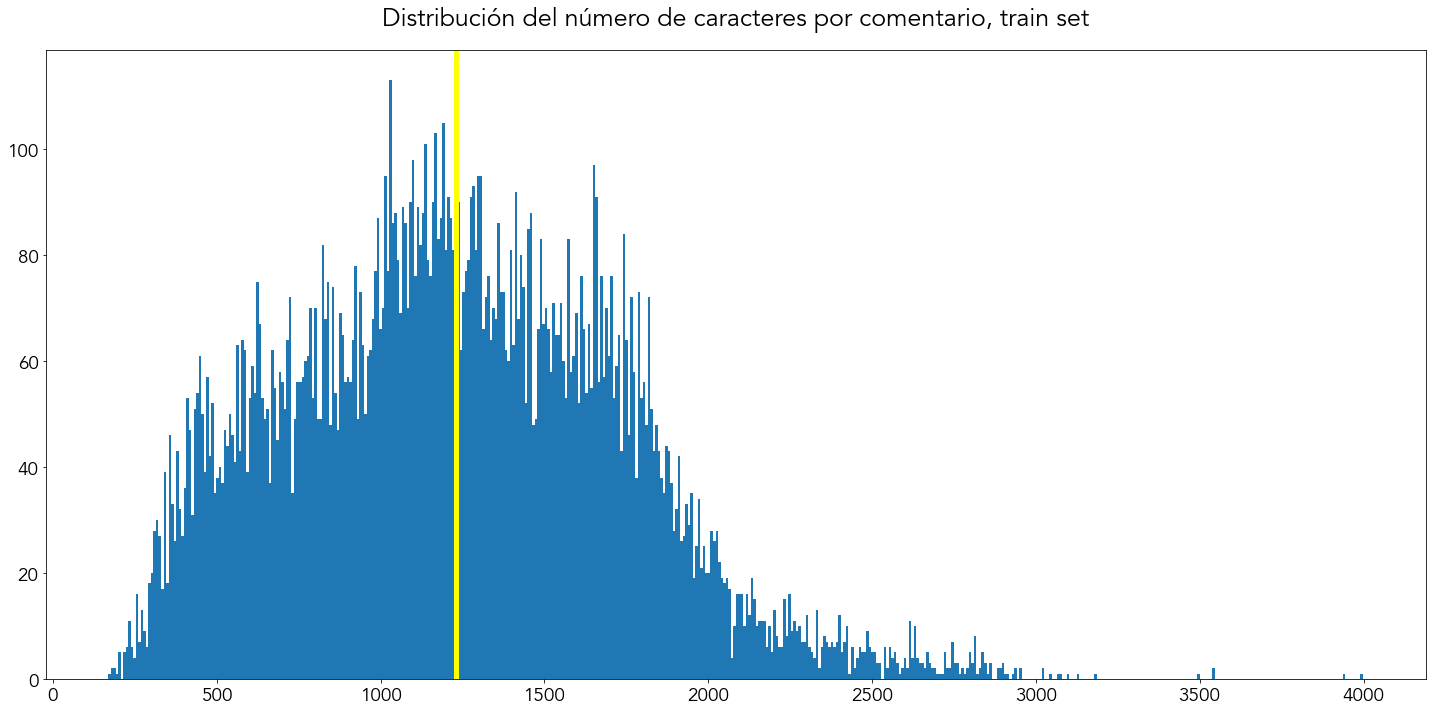

In [15]:
plt.figure(figsize=(20, 10))
plt.hist(avg_char, bins=500)
plt.title('Distribución del número de caracteres por comentario, train set')
plt.axvline(np.average(avg_char), color='yellow', linewidth=5)
plt.tight_layout()
#plt.savefig('media/char_hist_train.pdf')


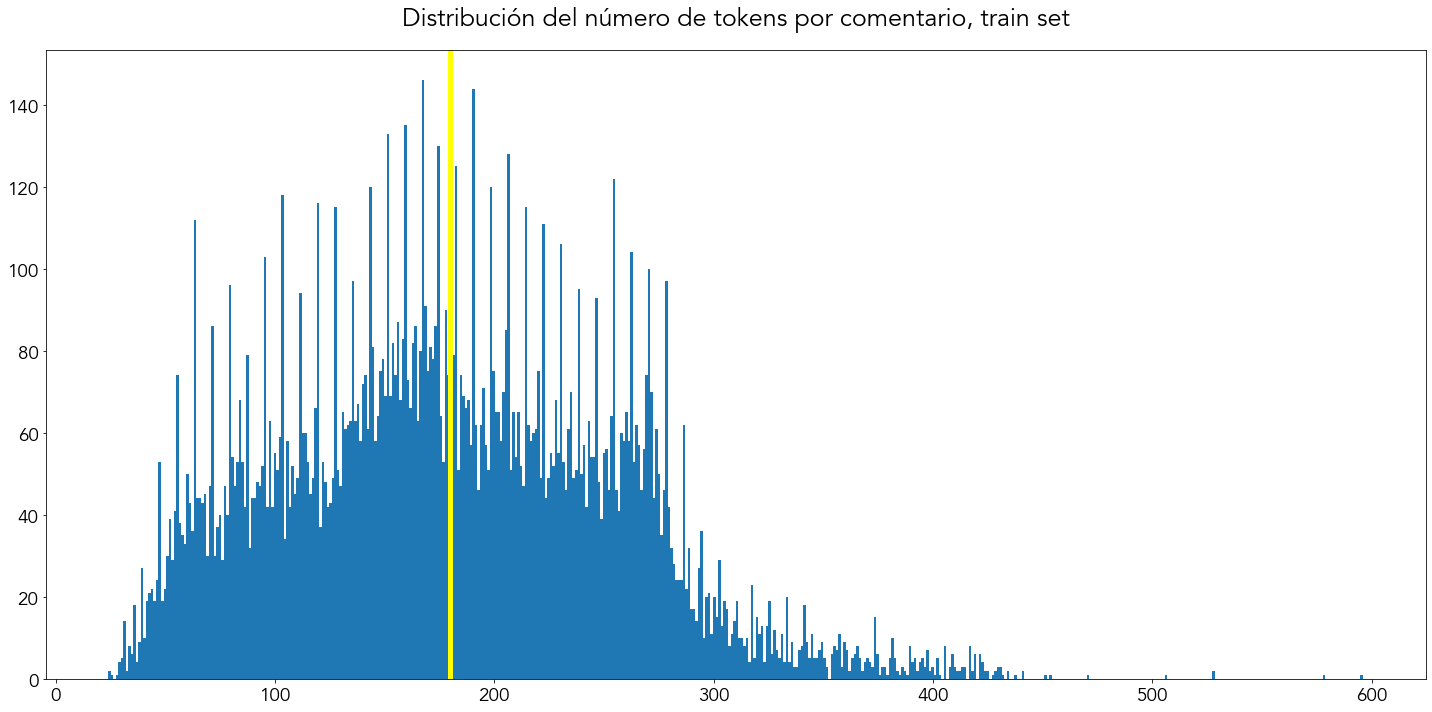

In [16]:
plt.figure(figsize=(20, 10))
plt.hist(avg_tokens, bins=500)
plt.title('Distribución del número de tokens por comentario, train set')
plt.axvline(np.average(avg_tokens), color='yellow', linewidth=5)
plt.tight_layout()
#plt.savefig('media/tokens_hist_train.pdf')

## TEST DATA 

In [17]:
comments = open(DATA_TEST, 'rb').readlines()

In [18]:
def split_tab(comment):
    return comment.decode(encoding='utf-8')

In [19]:
comments_clean = list(map(split_tab, comments))

In [20]:
comments_clean = ' '.join(comments_clean)

In [21]:
print(f'Length of text: {len(comments_clean)} characters')

Length of text: 18258642 characters


In [22]:
sentences_ts = comments_clean.split(' \n ')

In [23]:
avg_char = list(map(len, sentences_ts))

In [24]:
print('Average no of caracters per comment: {}'.format(np.average(avg_char)))

Average no of caracters per comment: 1261.2739925218114


In [25]:
def len_tokens(com):
    a = com.split(' ')
    return len(a)

In [26]:
avg_tokens = list(map(len_tokens, sentences_ts))

In [27]:
print('Average no of tokens per comment: {}'.format(np.average(avg_tokens)))

Average no of tokens per comment: 184.29171859853207


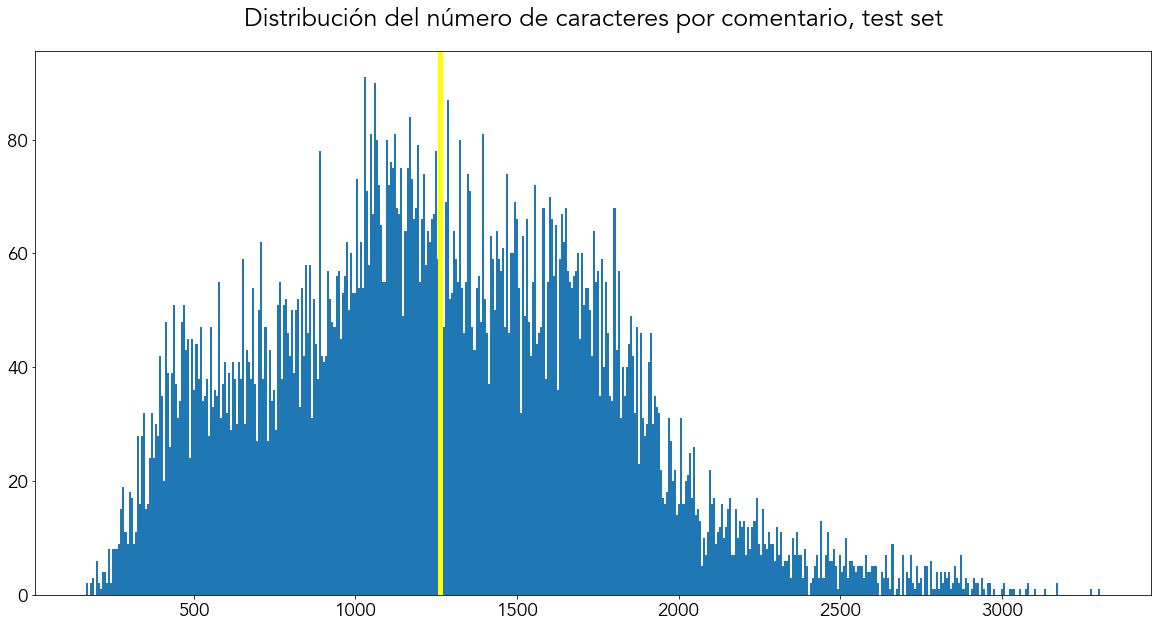

In [28]:
plt.figure(figsize=(20, 10))
plt.hist(avg_char, bins=500)
plt.title('Distribución del número de caracteres por comentario, test set')
plt.axvline(np.average(avg_char), color='yellow', linewidth=5)
# plt.tight_layout()
#plt.savefig('media/char_hist_test.pdf')
plt.show()

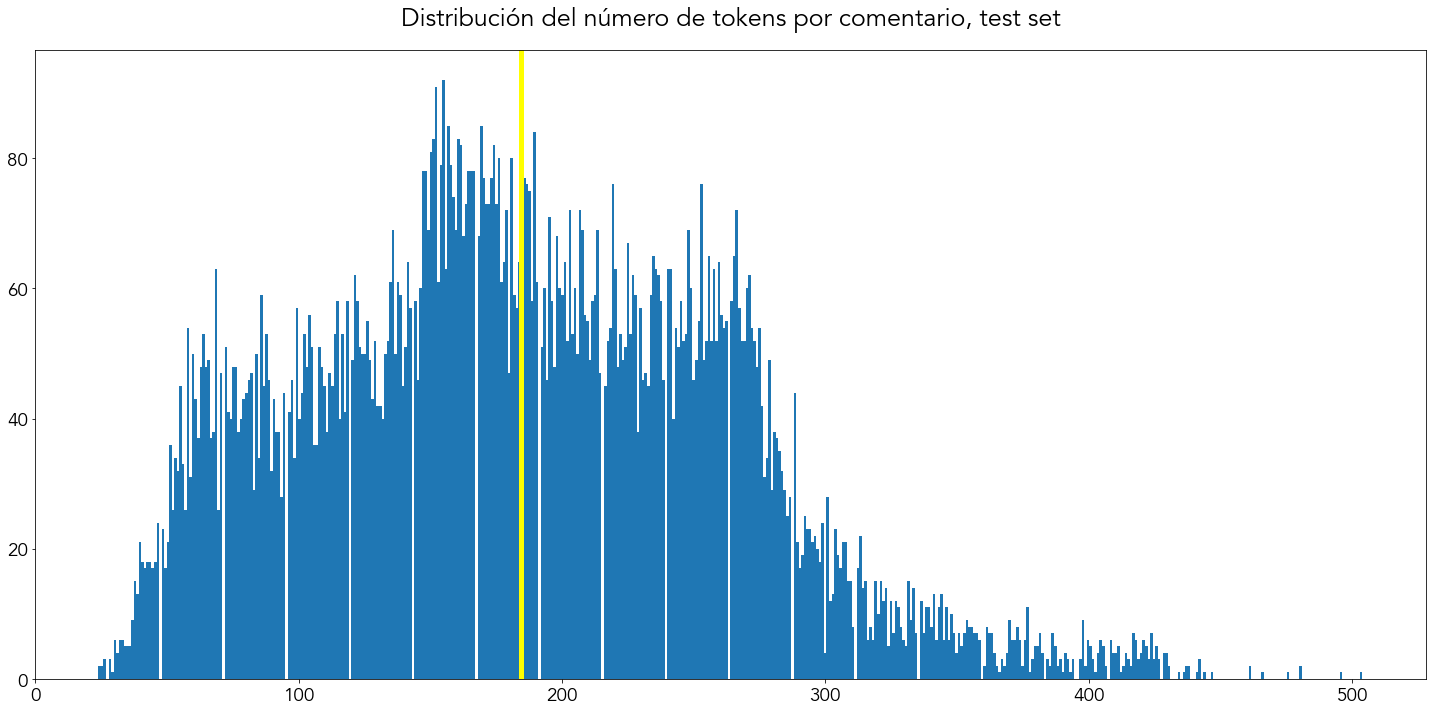

In [29]:
plt.figure(figsize=(20, 10))
plt.hist(avg_tokens, bins=500)
plt.title('Distribución del número de tokens por comentario, test set')
plt.axvline(np.average(avg_tokens), color='yellow', linewidth=5)
plt.tight_layout()
plt.show()
# plt.savefig('media/tokens_hist_test.pdf')

In [30]:
sentences_ts[:5]

['Excision of limbal dermoids. We reviewed the clinical files of 10 patients who had undergone excision of unilateral epibulbar limbal dermoids. Preoperatively, all of the affected eyes had worse visual acuity (P less than .02) and more astigmatism (P less than .01) than the contralateral eyes. Postoperatively, every patient was cosmetically improved. Of the eight patients for whom both preoperative and postoperative visual acuity measurements had been obtained, in six it had changed minimally (less than or equal to 1 line), and in two it had improved (less than or equal to 2 lines). Surgical complications included persistent epithelial defects (40%) and peripheral corneal vascularization and opacity (70%). These complications do not outweigh the cosmetic and visual benefits of dermoid excision in selected patients.',
 "Bell's palsy. A diagnosis of exclusion. In cases of acute unilateral facial weakness, a careful and systematic evaluation is necessary to identify the cause. Idiopathic

## MTSamples.csv dataset

In [31]:
import pandas as pd

In [32]:
MTSAMPLES = '../data/mtsamples.csv'

In [33]:
data = pd.read_csv(MTSAMPLES, index_col=0)

In [34]:
data.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [35]:

med_text = data[data.transcription.notna()].transcription

In [36]:
med_text[0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [37]:
med_text[20]

'INDICATION:,  Prostate Cancer.,TECHNIQUE:,  3.5 hours following the intravenous administration of 26.5 mCi of Technetium 99m MDP, the skeleton was imaged in the anterior and posterior projections.,FINDINGS:,  There is a focus of abnormal increased tracer activity overlying the right parietal region of the skull.  The uptake in the remainder of the skeleton is within normal limits.  The kidneys image normally.  There is increased activity in the urinary bladder suggesting possible urinary retention.,CONCLUSION:,1.  Focus of abnormal increased tracer activity overlying the right parietal region of the skull.  CT scanning of magnetic resonance imaging of the skull and brain could be done for further assessment if it is clinically indicated.,2.  There is probably some degree of urinary retention.,'

## REGEX PROCESSING

Let us clean the text before doing anything else.

In [38]:
def regex_processing(text):
    # Remove capital letters surrounded by 0 or more `,` and a colon, i.e. the titles
    no_caps = re.sub(r',*([A-Z\s]+):', '', text)

    # Remove weirdly positioned commas. Find commas that dont have any letter before and some space after them.
    weird_commas = re.sub(r'(?<!\w),\s+', '', no_caps)
    
    # Remove commas that dont have spaces around them. (Commas should always have a trailing space after them)
    more_commas = re.sub(r'(?<!\s),(?!\s)', ' ', weird_commas)

    # Remove digits adyacent to dots or commas, as in enumerated lists.
    no_digits = re.sub(r'[\.,]*\d[\.,]+', ' ', more_commas)

    # Remove any other commas left behind the process. Particularly these cases: Hello. ,How are you?
    trailing_commas = re.sub(r'\s,(?=[A-Z\d])', '', no_digits)

    # Substitute any number of spaces for 1 single space.
    no_double_spaces = re.sub(r'\s+', ' ', trailing_commas)

    # Solve these problems: Hello .How are you? => Hello. How are you?
    final_text = re.sub(r'(?<!\s)\.(?!\s)', '. ', no_double_spaces)

    # Finally, strip the text from any trailing commas or white spaces.
    # The result is hopefully a clean version of the text, ready to be tokenized
    # and passed to the models.
    return final_text.strip(', ')



In [39]:
processed_trascriptions = list(map(regex_processing, med_text))

In [40]:
processed_trascriptions[20]

'Prostate Cancer 5 hours following the intravenous administration of 2 5 mCi of Technetium 99m MDP, the skeleton was imaged in the anterior and posterior projections. There is a focus of abnormal increased tracer activity overlying the right parietal region of the skull. The uptake in the remainder of the skeleton is within normal limits. The kidneys image normally. There is increased activity in the urinary bladder suggesting possible urinary retention. Focus of abnormal increased tracer activity overlying the right parietal region of the skull. CT scanning of magnetic resonance imaging of the skull and brain could be done for further assessment if it is clinically indicated. There is probably some degree of urinary retention.'

In [41]:
avg_tokens_tr = list(map(len_tokens, processed_trascriptions))

In [42]:
avg_chars_tr = list(map(len, processed_trascriptions))

In [43]:
np.average(avg_tokens_tr)


458.76419653644786

In [44]:
np.average(avg_chars_tr)

2862.3626661296817

The PDF backend does not currently support the selected font.


RuntimeError: TrueType font is missing table

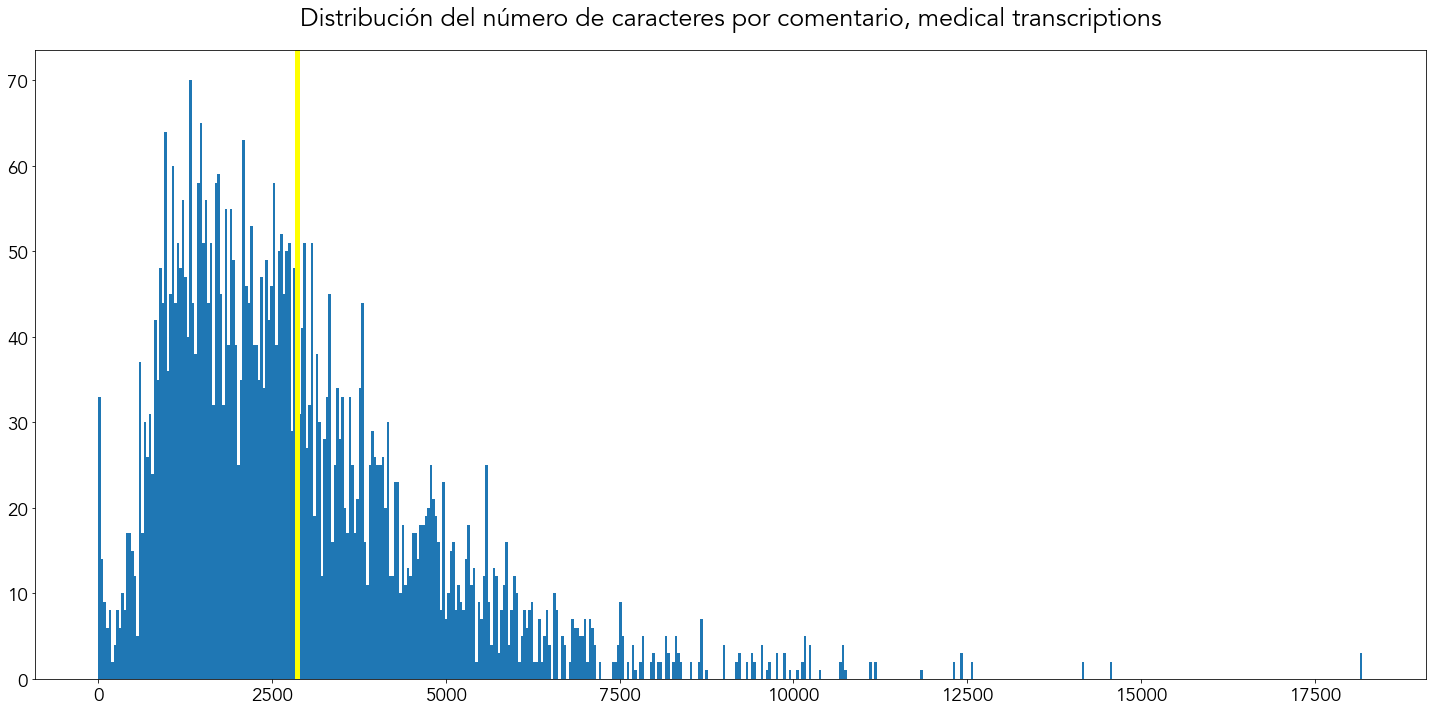

In [45]:
plt.figure(figsize=(20, 10))
plt.hist(avg_chars_tr, bins=500)
plt.title('Distribución del número de caracteres por comentario, medical transcriptions')
plt.axvline(np.average(avg_chars_tr), color='yellow', linewidth=5)
plt.tight_layout()
plt.savefig('media/char_hist_mdtr.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(avg_tokens_tr, bins=500)
plt.title('Distribución del número de tokens por comentario, medical transcriptions')
plt.axvline(np.average(avg_tokens_tr), color='yellow', linewidth=5)
plt.tight_layout()
plt.savefig('media/token_hist_mdtr.pdf')
plt.show()

In [46]:
full_data = processed_trascriptions + sentences_tr + sentences_ts

In [47]:
full_data = list(map(str, full_data))

In [48]:
len(full_data)

33846

In [49]:
full_data[-1]

'Clinical aspects of pelvic inflammatory disease. Pelvic inflammatory disease is caused by spread of organisms from the vagina and cervix to the upper genital tract. The patient may have a life-threatening illness or may remain asymptomatic. The disease may be caused by sexually or nonsexually transmitted organisms. Polymicrobial infections are the rule. Therapy requires antibiotic agents with broad coverage of aerobic and anaerobic organisms, including Chlamydia trachomatis and Neisseria gonorrhoeae. \n'

In [50]:
np.average(list(map(len_tokens, full_data)))

222.70569638952904

In [51]:
np.average(list(map(len, full_data)))

1482.7082964013473

In [52]:
len(' '.join(full_data).split(' '))

7537697

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [71]:
wordcloud = WordCloud(stopwords=set(STOPWORDS), height=1080, width=1920, background_color='white').generate(' '.join(full_data))

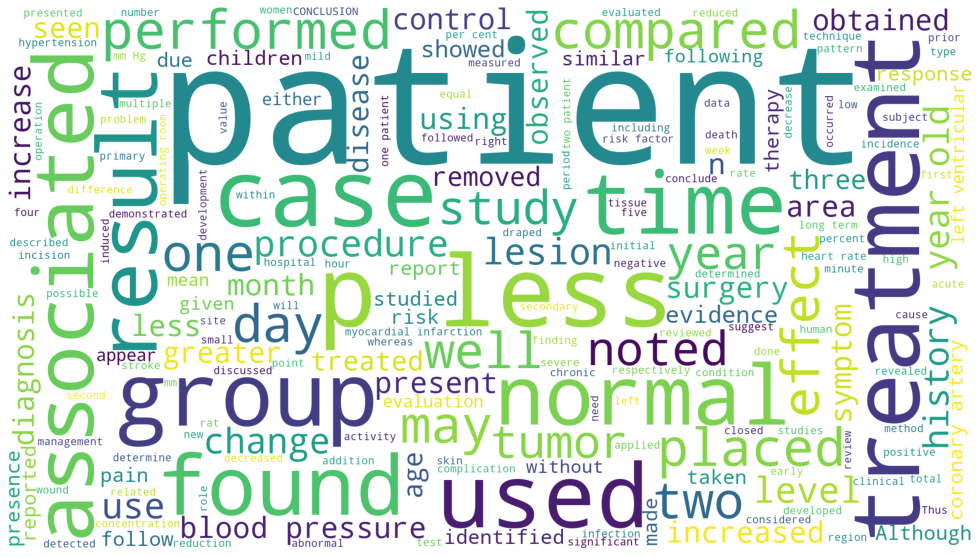

In [72]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
wordcloud.to_file("media/wordcloud_full_data.png")

# PREPROCESSING AND SAVING OF THE DATA

In [ ]:
def add_special_tags(comment):
    return f'<|BOS|>{comment}<|EOS|>'

In [ ]:
def split_tab(comment, category=False):
    if not category:
        return comment.decode(encoding='utf-8')
    else:
        return comment.decode(encoding='utf-8').split('\t')[1]

### Medical text

In [ ]:
def preprocess_and_save(in_file_path, out_file_path, category=False):
    comments = open(in_file_path, 'rb').readlines()
    split_tab_c = [split_tab(c, category) for c in comments]

    comments_clean = ' '.join(split_tab_c)
    sentences = comments_clean.split(' \n ')
    add_tags = [add_special_tags(s) for s in sentences]
    a = open(out_file_path, 'w')
    a.write('\n'.join(add_tags))
    a.close()

In [ ]:
preprocess_and_save(DATA_TRAIN, 'train_tagged.txt', category=True)

In [ ]:
preprocess_and_save(DATA_TEST, 'test_tagged.txt')

### Medical Transcriptions

In [ ]:
def regex_processing(text):
    # Remove capital letters surrounded by 0 or more `,` and a colon, i.e. the titles
    no_caps = re.sub(r',*([A-Z\s]+):', '', text)

    # Remove weirdly positioned commas. Find commas that dont have any letter before and some space after them.
    weird_commas = re.sub(r'(?<!\w),\s+', '', no_caps)
    
    # Remove commas that dont have spaces around them. (Commas should always have a trailing space after them)
    more_commas = re.sub(r'(?<!\s),(?!\s)', ' ', weird_commas)

    # Remove digits adyacent to dots or commas, as in enumerated lists.
    no_digits = re.sub(r'[\.,]*\d[\.,]+', ' ', more_commas)

    # Remove any other commas left behind the process. Particularly these cases: Hello. ,How are you?
    trailing_commas = re.sub(r'\s,(?=[A-Z\d])', '', no_digits)

    # Substitute any number of spaces for 1 single space.
    no_double_spaces = re.sub(r'\s+', ' ', trailing_commas)

    # Solve these problems: Hello .How are you? => Hello. How are you?
    final_text = re.sub(r'(?<!\s)\.(?!\s)', '. ', no_double_spaces)

    # Finally, strip the text from any trailing commas or white spaces.
    # The result is hopefully a clean version of the text, ready to be tokenized
    # and passed to the models.
    return final_text.strip(', ')

In [ ]:
MTSAMPLES = '../data/mtsamples.csv'

In [ ]:
def preprocess_and_save_mdtr(in_file_path, out_file_path):
    data = pd.read_csv(MTSAMPLES, index_col=0)
    med_text = data[data.transcription.notna()].transcription
    processed_trascriptions = list(map(regex_processing, med_text))
    tagged_transcriptions = list(map(add_special_tags, processed_trascriptions))

    a = open(out_file_path, 'w')
    a.write('\n'.join(tagged_transcriptions))
    a.close()

In [ ]:
preprocess_and_save_mdtr(MTSAMPLES, 'mdtr_tagged.txt')

# TEXT SIMILARITY

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [6]:
with open('../results/generated_comments.txt') as file:
    comments = file.readlines()

In [9]:
comments = list(map(str.strip, comments))

In [10]:
comments[0]

'Paediatric invasive immunosuppression (IPIS) in the treatment of recurrent kidney disease. Epidemiologic evidence suggests a association between immunosuppression and recurrence of recurrent kidney disease. Acute renal injury is a major risk factor for recurrent kidney disease. As the patient develops a family history of recurrence, his status will likely be monitored to determine whether he may benefit from continued immunosuppression. We have collected evidence of a decrease in renal immunosuppression in a'

In [18]:
tfidf = TfidfVectorizer(stop_words='english').fit_transform(comments)

In [19]:
cosine_sim = tfidf * tfidf.T

In [20]:
cosine_sim

<99x99 sparse matrix of type '<class 'numpy.float64'>'
	with 6487 stored elements in Compressed Sparse Row format>

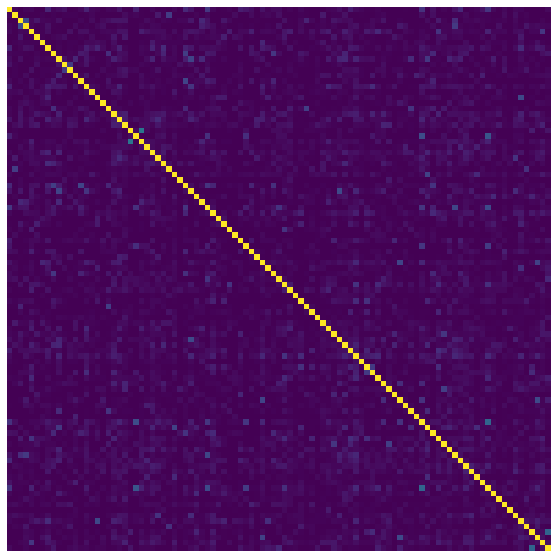

In [21]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cosine_sim.toarray())